In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
import pandas as pd
import requests
from io import StringIO

csv_url = "https://drive.google.com/uc?export=download&id=1GfVGnAA0FN6xpRg-clvQavWlh34M-NKH"

response = requests.get(csv_url)

# download data set and load it
if response.status_code == 200:
    if "confirm" in response.url:
        confirm_token = response.cookies["download_warning"]
        new_csv_url = csv_url + "&confirm=" + confirm_token
        response = requests.get(new_csv_url)
        if response.status_code == 200:
            csv_data = response.text
            df = pd.read_csv(StringIO(csv_data))
        else:
            print("Failed to download the CSV file.")
    else:
        csv_data = response.text
        df = pd.read_csv(StringIO(csv_data))
else:
    print("Failed to download the CSV file.")

<font face="B Mitra">
<div dir=rtl>
<font size=5>
<b>  پیش پردازش و کاوش داده </b>
<br>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  نمایش ابعاد داده </b>
<br>
</div>
</font>

In [ ]:
print(f'{df.shape}')

(145460, 24)


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  پیش نمایش مجموعه داده</b>
<br>
</div>
</font>

In [ ]:
df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  نمایش فیچر های مجموعه داده </b>
<br>
</div>
</font>

In [ ]:
df_cols = df.columns
df_cols

Index(['Unnamed: 0', 'Date', 'Weather Station', 'Minimum Temperature',
       'Maximum Temperature', 'Rainfall', 'Evaporation', 'Sunshine',
       'Gust Trajectory', 'Air Velocity', 'Gust Trajectory at  9 AM',
       'Gust Trajectory at  3 PM', 'Air Velocity at  9 AM',
       'Air Velocity at  3 PM', 'Moisture Level at 9 AM',
       'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
       'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM',
       'Cloudiness at 3 PM', 'Recorded Temperature at 9 AM',
       'Recorded Temperature at 3 PM', 'Rain that day', 'Rain the day after'],
      dtype='object')

<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  توزیع درصدی برچسب بارش روز بعد

آیا کلاس ها متوازن اند؟ </b>
<br>
</div>
</font>

In [ ]:
df['Rain the day after'].value_counts()/len(df)*100

Rain the day after
No     75.839406
Yes    21.914616
Name: count, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 AM         143693 non-nul

<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  فیچرهایی که از جنس object هستند را نیاز داریم عددی کنیم تا مدل را روی آن اجرا کنیم. </b>
<br>
</div>
</font>

In [ ]:
df.isnull().sum()/145460*100

Unnamed: 0                       0.000000
Date                             0.000000
Weather Station                  0.000000
Minimum Temperature              1.020899
Maximum Temperature              0.866905
Rainfall                         2.241853
Evaporation                     43.166506
Sunshine                        48.009762
Gust Trajectory                  7.098859
Air Velocity                     7.055548
Gust Trajectory at  9 AM         7.263853
Gust Trajectory at  3 PM         2.906641
Air Velocity at  9 AM            1.214767
Air Velocity at  3 PM            2.105046
Moisture Level at 9 AM           1.824557
Moisture Level at 3 PM           3.098446
Atmospheric Pressure at 9 AM    10.356799
Atmospheric Pressure at 3 PM    10.331363
Cloudiness at 9 AM              38.421559
Cloudiness at 3 PM              40.807095
Recorded Temperature at 9 AM     1.214767
Recorded Temperature at 3 PM     2.481094
Rain that day                    2.241853
Rain the day after               2

<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  مقادیر گمشده در بعضی از فیچر ها به قدری زیاد است که می‌توان از آن ستون داده صرف نظر کرد. برای ستون های دیگر از روش label encoding استفاده می‌کنیم. </b>
<br>
</div>
</font>

In [ ]:
features_to_exclude = ['Evaporation',
                       'Sunshine',
                       'Cloudiness at 3 PM',
                       'Cloudiness at 9 AM']

In [ ]:
df_drp = df.drop(features_to_exclude, axis=1)

In [ ]:
df_fillna = df_drp.fillna(df.mean() if df_drp.dtypes.name in ['float64', 'int64'] else df_drp.mode().iloc[0])


In [ ]:
df_fillna.isnull().sum()

Unnamed: 0                      0
Date                            0
Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Rain the day after              0
dtype: int64

In [ ]:
categorical_columns = ['Gust Trajectory',
                       'Gust Trajectory at  9 AM',
                       'Gust Trajectory at  3 PM',
                       'Rain that day',
                       'Rain the day after']

In [ ]:
label_encoder = LabelEncoder()
for _ in categorical_columns:
  df_fillna[_] = label_encoder.fit_transform(df_fillna[_])

In [ ]:
df_fillna.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,12/2/2008,Station 2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12/3/2008,Station 2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,3,12/4/2008,Station 2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,4,12/5/2008,Station 2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  داده های تست و آموزش را برای بردار هدف و بردار فیچرها مشخص می‌کنیم. </b>
<br>
</div>
</font>

In [ ]:
X = df_fillna.drop(['Rain the day after', 'Date', 'Weather Station', 'Unnamed: 0'], axis=1)
y = df_fillna['Rain the day after']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[X.columns])

X_test = pd.DataFrame(X_test, columns=[X.columns])

X_train.describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day
count,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05,1.163680e+05
mean,1.908124e-17,7.119593e-17,7.021897e-19,1.717007e-16,8.963605e-17,-4.457378e-17,-2.283643e-17,8.560609e-17,1.709679e-16,-4.127654e-17,9.789441e-17,-1.039418e-14,2.252350e-14,-2.897906e-16,-7.054870e-16,-5.257264e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.247512e+00,-3.945642e+00,-2.745367e-01,-1.725889e+00,-2.555152e+00,-1.552361e+00,-1.720810e+00,-1.575415e+00,-2.119636e+00,-3.611317e+00,-2.524758e+00,-5.492768e+00,-5.727746e+00,-3.749586e+00,-3.944512e+00,-5.305403e-01
25%,-7.035257e-01,-7.305047e-01,-2.745367e-01,-8.732302e-01,-6.596167e-01,-8.873654e-01,-8.378722e-01,-7.868784e-01,-6.353571e-01,-6.489098e-01,-7.145740e-01,-5.958254e-01,-6.237816e-01,-7.261142e-01,-7.194528e-01,-5.305403e-01
50%,-4.397372e-02,-9.593801e-02,-2.745367e-01,1.925934e-01,-2.046881e-01,-7.047995e-04,4.506574e-02,-1.109898e-01,-1.786560e-01,2.672697e-02,1.928443e-02,-1.358096e-01,6.708194e-03,-2.838992e-02,-1.065456e-01,-5.305403e-01
75%,7.255036e-01,7.078464e-01,-2.035695e-01,1.045252e+00,4.777047e-01,8.859558e-01,9.280037e-01,5.648987e-01,6.205711e-01,7.543358e-01,6.552950e-01,6.358298e-01,6.221863e-01,7.003443e-01,6.668849e-01,-5.305403e-01
max,3.096750e+00,3.514041e+00,4.320469e+01,1.471582e+00,7.225812e+00,1.772616e+00,1.590207e+00,1.306884e+01,7.356913e+00,1.585889e+00,2.367631e+00,3.484960e+00,3.654542e+00,3.599776e+00,3.658456e+00,1.884871e+00


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  با فراپارامترهای پیش فرض SVM را اجرا می‌کنیم. استفاده از کرنل های خطی و چند جمله‌ای عملکرد مدل را کاهش داد. </b>
<br>
</div>
</font>

In [ ]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(verbose=True)

svc.fit(X_trn,y_trn)

y_pred_val = svc.predict(X_val)
y_pred_trn = svc.predict(X_trn)

print('Train accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_val, y_pred_val)))
print('Validation accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_trn, y_pred_trn)))

[LibSVM]Train accuracy score with default hyperparameters: 0.8493
Validation accuracy score with default hyperparameters: 0.8538


In [ ]:
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Test accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[LibSVM]Test accuracy score with default hyperparameters: 0.8333


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  آیا مدل پیش برازش شده است؟ </b>
<br>
</div>
</font>

In [ ]:
y_pred_train =svc.predict(X_train)
print('Train accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Train accuracy score with default hyperparameters: 0.8541


<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  بطور تصادفی با چه احتمالی برچسب مثبت را انتخاب می‌کردیم؟ </b>
<br>
</div>
</font>

In [ ]:
null_accuracy = (75.839406/(75.839406+21.914616))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7758


<Axes: >

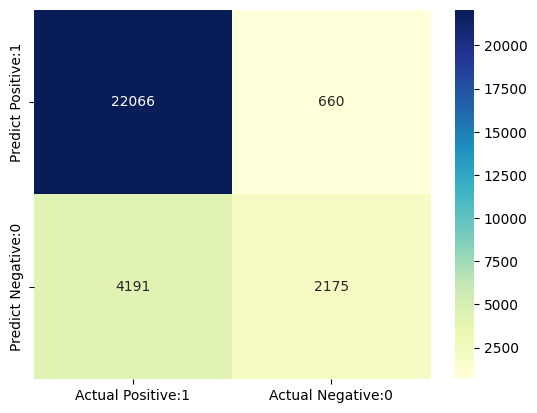

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<font face="B Mitra">
<div dir=rtl>
<font size=3>
<b>  به دلیل عدم توازن برچسب ها مقادیر مثبتی که به اشتباه منفی پیش بینی شده‌اند زیاد است! </b>
<br>
</div>
</font>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22726
           1       0.77      0.34      0.47      6366

    accuracy                           0.83     29092
   macro avg       0.80      0.66      0.69     29092
weighted avg       0.82      0.83      0.81     29092



In [ ]:
class_error = (cm[0, 1] + cm[1, 0]) / float(cm[0, 1]+cm[1, 1] + cm[0, 0]+cm[1, 0])


print('Classification Error : {0:0.4f}%'.format(class_error * 100))

Classification Error : 16.6747%
